<h1>Carregamento de Dados</h1>

In [1]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df = pd.read_csv("dados/online_shoppers_intention.csv")

<h3>Visualizar Primeiras Linhas de Dados</h3>

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


<h3>Visualizar os tipos do dados</h3>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

<h3>Visualizar a presença de Valores Nulos</h3>

In [5]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

<h3>Não foram encontrados Valores nulos, um tratamento a menos</h3>

<h3>Criar um Dicionário de dados resumido</h3>

In [6]:
data_dictionary = pd.DataFrame({
    "Coluna": df.columns,
    "Tipo de dado": df.dtypes.values,
    "Valores únicos": df.nunique().values,
    "Exemplo": [df[col].dropna().unique()[0] for col in df.columns]
})

data_dictionary


,Coluna,Tipo de dado,Valores únicos,Exemplo
0,Administrative,int64,27,0
1,Administrative_Duration,float64,3335,0.0
2,Informational,int64,17,0
3,Informational_Duration,float64,1258,0.0
4,ProductRelated,int64,311,1
5,ProductRelated_Duration,float64,9551,0.0
6,BounceRates,float64,1872,0.2
7,ExitRates,float64,4777,0.2
8,PageValues,float64,2704,0.0
9,SpecialDay,float64,6,0.0


<h3>Visualização rápida da distribuição da variável target</h3>

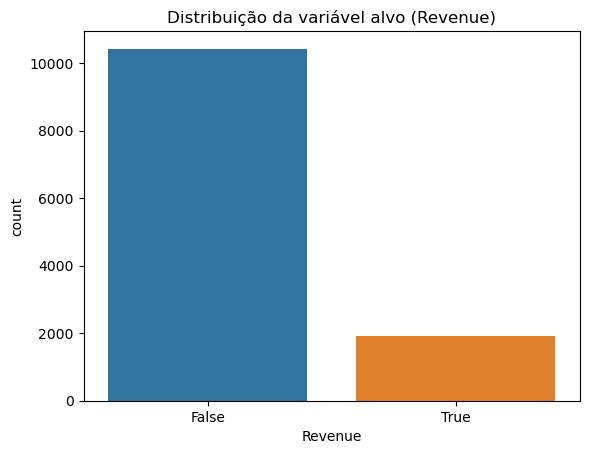

In [7]:
sns.countplot(data=df, x='Revenue')
plt.title("Distribuição da variável alvo (Revenue)")
plt.show()


<h3>Aparentemente não temos valores nulos, vamos utilizar outra técnica para se certificar</h3>

In [8]:
# Verificar percentual de valores ausentes por coluna
missing_percent = df.isnull().mean() * 100
missing_percent[missing_percent > 0].sort_values(ascending=False)

if missing_percent[missing_percent > 0].empty:
    print("✅ Não há valores ausentes no dataset.")
else:
    print("⚠️ Colunas com valores ausentes:")
    print(missing_percent[missing_percent > 0].sort_values(ascending=False))



✅ Não há valores ausentes no dataset.


<h4>Verificar valores únicos</h4>

In [9]:
df.nunique().sort_values()


Revenue                       2
Weekend                       2
VisitorType                   3
SpecialDay                    6
OperatingSystems              8
Region                        9
Month                        10
Browser                      13
Informational                17
TrafficType                  20
Administrative               27
ProductRelated              311
Informational_Duration     1258
BounceRates                1872
PageValues                 2704
Administrative_Duration    3335
ExitRates                  4777
ProductRelated_Duration    9551
dtype: int64

<h4>Colunas com poucos valores únicos
Revenue, Weekend, VisitorType, SpecialDay, OperatingSystems, Region, Month, Browser, Informational, TrafficType<br> → São categóricas ou quase categóricas.<br>

Podem ser codificadas como variáveis dummy ou com ordinal encoding posteriormente.<br>
</h4>

<h4>Verificar Distribuições das variáveis</h4>

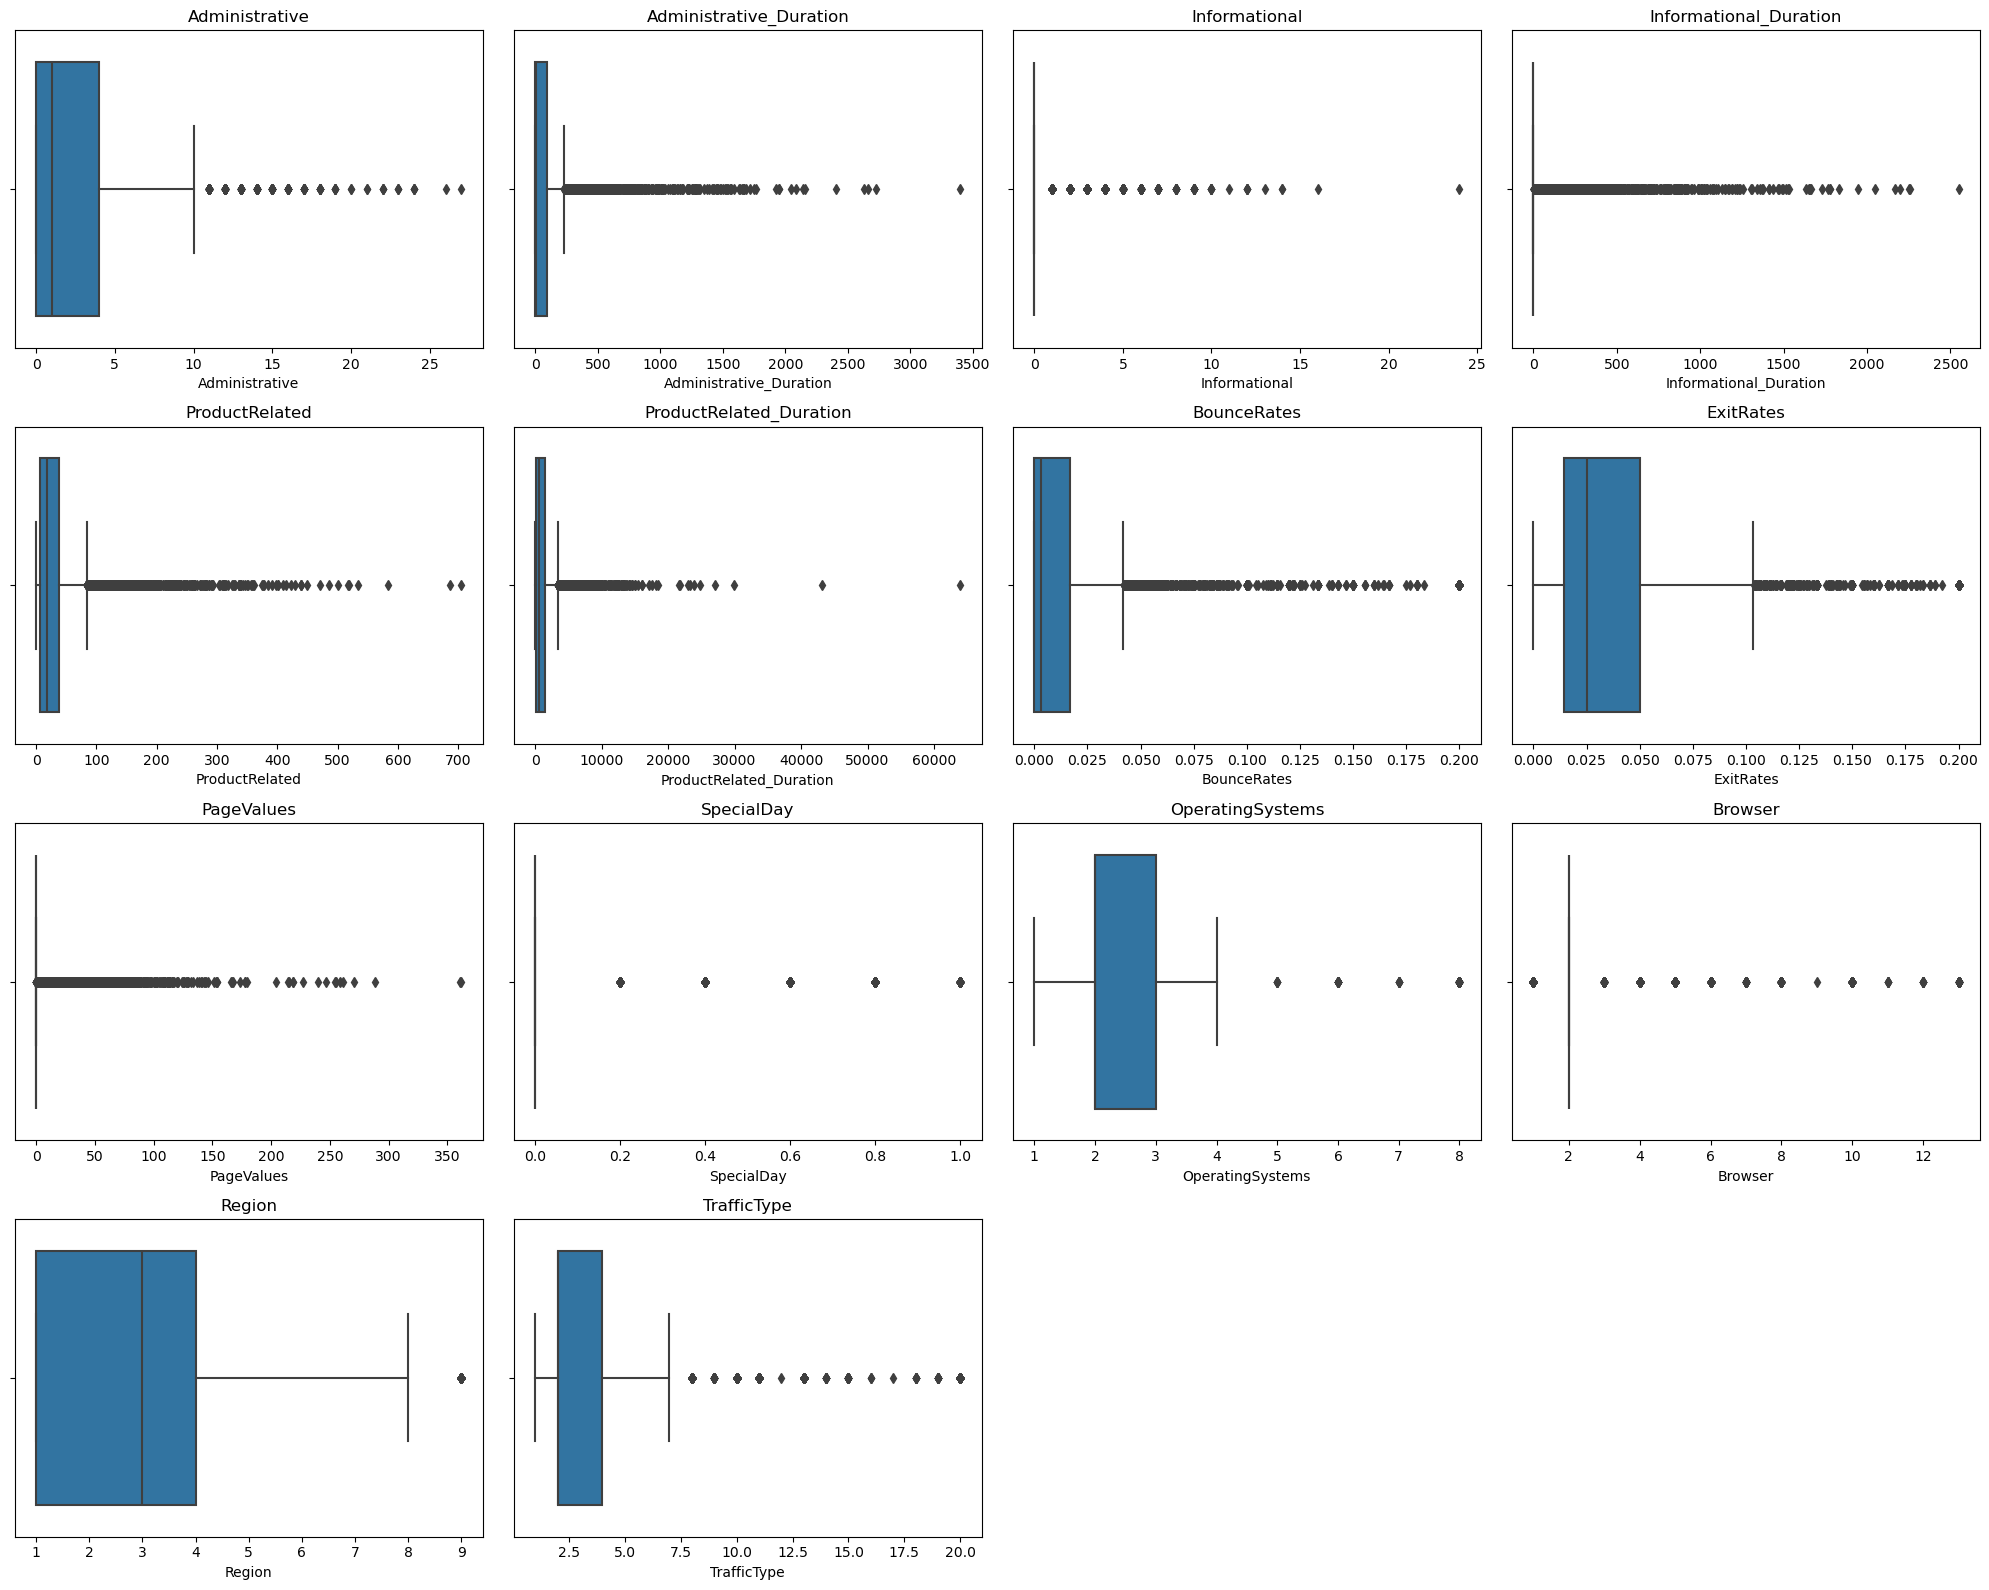

In [10]:
# Lista de colunas numéricas
numericas = df.select_dtypes(include=['int64', 'float64']).columns
qtd = len(numericas)

# Definir número de linhas e colunas dinamicamente
cols = 4
rows = math.ceil(qtd / cols)

plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(numericas):
    plt.subplot(rows, cols, i+1)
    sns.boxplot(data=df, x=col)
    plt.title(col)

plt.tight_layout()
plt.show()


<h4>Distribuições de medidas de tendência central e quartis das variáveis numéricas</h4>

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


<h4>
⚠️ Outliers não devem ser removidos ainda sem entender se são erros ou comportamento válido.

⚙️ Para variáveis com valores assimétricos como ProductRelated_Duration e PageValues considerar:

Log transformação

Normalização (MinMaxScaler)

Padronização (StandardScaler)

📊 Pode-se criar uma flag de outlier com base no IQR para mais controle.

As colunas como BounceRates, ExitRates, ou Administrative_Duration têm valores extremos também, mas a variância não é tão significativa ao ponto de valer o custo de complexidade (por enquanto).
</h4>

In [16]:
def cria_flag_outlier(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    flag_name = f"{coluna}_Outlier"
    df[flag_name] = ((df[coluna] < limite_inferior) | (df[coluna] > limite_superior)).astype(int)
    
    # Exibir contagem e percentual
    outliers = df[flag_name].sum()
    total = len(df)
    percentual = (outliers / total) * 100
    print(f"{flag_name}: {outliers} outliers ({percentual:.2f}%)")
    
    return df

# Aplicar para as colunas escolhidas
df = cria_flag_outlier(df, 'PageValues')
df = cria_flag_outlier(df, 'ProductRelated_Duration')


PageValues_Outlier: 2730 outliers (22.14%)
ProductRelated_Duration_Outlier: 961 outliers (7.79%)


<h4>
📌 PageValues_Outlier (~22%)
Quase 1 em cada 5 visitas tem um valor de página extremamente alto.

Isso pode indicar compradores reais, carrinhos cheios ou pessoas que interagiram com promoções específicas.

Esse comportamento pode ser fortemente associado ao target Revenue = True.

📌 ProductRelated_Duration_Outlier (~8%)
Visitas com navegação muito longa em páginas de produtos.

Pode indicar alto engajamento, mas também comportamento indeciso, comparações extensas, etc
</h4>

In [13]:
# Cruzar com Revenue
pd.crosstab(df['PageValues_Outlier'], df['Revenue'], normalize='index') * 100


Revenue,False,True
PageValues_Outlier,,
0,96.145833,3.854167
1,43.663004,56.336996


In [14]:
pd.crosstab(df['ProductRelated_Duration_Outlier'], df['Revenue'], normalize='index') * 100


Revenue,False,True
ProductRelated_Duration_Outlier,,
0,85.759522,14.240478
1,69.927159,30.072841


<h4>
📌 Insight:

Sessões com tempo extremamente alto em páginas de produto têm mais que o dobro da taxa de conversão em comparação com sessões normais (30% vs 14%).<br>

Essa variável pode ser útil no modelo tanto como feature contínua quanto como flag binária de comportamento intenso.
</h4>